# Predicting Days Before Lapse for Marijuana Drug Abusers

In [134]:
import pandas as pd

# read csv from github url
# return pandas dataframe
url = 'https://raw.githubusercontent.com/prathikr/CS_499_Final_Project/master/BISTRA_GROUP_PROJECT_SMALL.csv'
df = pd.read_csv(url)
df.head(5)

,ID,female,nonwhite,unemplmt,primsev,B2a_0,State,City,zipcode,noins,...,Any_Cens,Alcohol_Cens,Binge_Cens,Marijuana_Cens,Illicit_Cens,Any_Days,Alcohol_Days,Binge_Days,Marijuana_Days,Illicit_Days
0,9048,0,0,0,4,17,VA,Lynchburg,24501-1114,0,...,2,2,2,2,2,192,192,192,192,192
1,9152,0,0,0,1,18,VA,Lynchburg,24501-1114,0,...,2,2,2,2,2,176,176,176,176,176
2,9057,0,0,1,3,16,VA,Lynchburg,24501-1114,0,...,0,0,2,0,2,21,21,365,81,365
3,9139,0,0,0,3,16,VA,Lynchburg,24501-1114,0,...,0,2,0,0,2,20,365,0,20,365
4,9051,0,1,0,3,17,VA,Lynchburg,24501-1114,0,...,0,0,0,0,1,14,30,30,14,356


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121985f98>]],
      dtype=object)

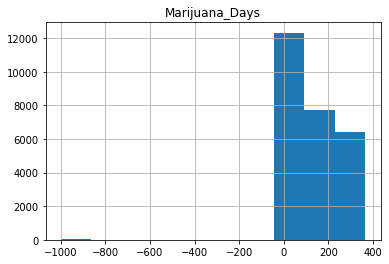

In [135]:
df.hist(column='Marijuana_Days')

In [120]:
print("Original df:", df.shape)

cols_to_drop = ['State', 'City', 'agyaddr', 'SFS8p_0', 'SFS8p_3', 'SFS8p_6', 'SFS8p_12', 'ada_0','ada_3',
'ada_6','ada_12','S2c1_0','S2c1_3','S2c1_6','S2c1_12','S2b1_0','S2b1_3','S2b1_6','S2b1_12','S2z1_3','S2z1_6',
'S2z1_12','S2z2_3','S2z2_6','S2z2_12','S2z3_3','S2z3_6','S2z3_12','S2z4_3','S2z4_6','S2z4_12','S2z5_3','S2z5_6',
'S2z5_12','Any_Cens','Alcohol_Cens','Binge_Cens','Marijuana_Cens','Illicit_Cens','Any_Days','Binge_Days',
'Alcohol_Days','Illicit_Days', 'SPSy_0', 'loc', 'AFSS_0', 'E9a', 'E9b', 'E9c', 'E9d', 'E9e', 'E9e18', 'E9f',
'E9g', 'E9h', 'E9j', 'E9k', 'E9m', 'txtypeg', 'S7e4_0', 'engage42', 'POPIgrp','L5', 'E14a_0', 'E14b_0', 'SDScrY']

# drop columns and isolate to specific substance
df.drop(columns=cols_to_drop, inplace=True)
df = df[df.primsev == 3] # leaves only marijuana drug abusers in dataframe
display(df['primsev'].head())
df.drop(columns=['primsev'], inplace=True)
df = df[df.B2a_0 < 20] # leaves only teenagers
display(df['B2a_0'].head())
Y = df['Marijuana_Days'].copy()
df.drop(columns=['Marijuana_Days'], inplace=True)
print("df Post-extracting predictor column and removing other predictors:", df.shape)
print("Predictor vector shape:", Y.shape)

Original df: (26556, 110)


2    3
3    3
4    3
6    3
7    3
Name: primsev, dtype: int64

2    16
3    16
4    17
6    17
7    18
Name: B2a_0, dtype: int64

df Post-extracting predictor column and removing other predictors: (13345, 42)
Predictor vector shape: (13345,)


In [121]:
# extract ID/ZIP for re-labelling later
print("Original df:", df.shape)
ID = df['ID'].copy()
zipcode = df['zipcode'].copy()
df.drop(columns=['ID', 'zipcode'], inplace=True)
print("New df:", df.shape)

Original df: (13345, 42)
New df: (13345, 40)


In [122]:
import numpy as np
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# replace all -999 with NaN inplace
df.replace(to_replace = -999, value = np.nan, inplace=True)

# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
third = int(round(len(missing_value_df) / 3))
display_side_by_side(missing_value_df[0:third], missing_value_df[third:third*2], missing_value_df[third*2:len(missing_value_df)])

print("DF.SHAPE", df.shape)
print("Y.SHAPE", Y.shape)

,column_name,percent_missing
female,female,0.000000
nonwhite,nonwhite,0.037467
unemplmt,unemplmt,0.157362
B2a_0,B2a_0,0.000000
noins,noins,60.989135
prsatx,prsatx,0.269764
tottxp4,tottxp4,0.000000
TRI_0,TRI_0,1.176471
GVS,GVS,0.172349
tsd_0,tsd_0,0.239790


DF.SHAPE (13345, 40)
Y.SHAPE (13345,)


In [123]:
print("Original df:", df.shape)

# drop columns with > 25% inplace
cols = []
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 25:
      cols.append(row['column_name'])
df.drop(columns=cols, inplace=True)
print("columns dropped:", cols)
print("new df shape:", df.shape)

bool_cols = [col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]
print("bool_cols", bool_cols)

Original df: (13345, 40)
columns dropped: ['noins', 'RFQ33c', 'GSSI_0', 'press', 'PSSI_0', 'RERI13p_0', 'FIS4p_0']
new df shape: (13345, 33)
bool_cols ['female', 'nonwhite', 'unemplmt', 'prsatx', 'tsd_0', 'und15', 'dldiag', 'suicprbs_0', 'homeless_0', 'S6', 'ncar', 'engage30', 'init']


In [124]:
print("Original df:", df.shape)

# replace binary column NaNs with mode
for column in bool_cols:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
# since binary columns are filled we can just replace all other NaNs with mean
for column in df.columns:
    df[column].fillna(df[column].mean(), inplace=True)
    
print("new df (should be same)", df.shape)
# maybe find elegant way to just print % NaNs in entire df and if anything but 0% something went wrong
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
all_null = True
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 0:
        all_null = False
        print(row['column_name'], "has null values!!!! rip...")
        
if all_null:
    print("\nno null values!!!! yay!!")

Original df: (13345, 33)
new df (should be same) (13345, 33)

no null values!!!! yay!!


df shape: (13345, 33)


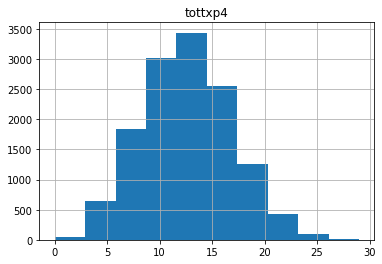

In [125]:
# normalize columns
from sklearn import preprocessing

cols = ['tottxp4', 'CWS_0', 'ADHDs_0', 'CDS_0', 'CJSI_0', 'EPS7p_0', 'LRI7_0', 'SRI7_0', 
          'ERS21_0', 'HIVrisk', 'totttld', 'S2x_0', 'SPSm_0']

# visualize data histograms before normalization as a sanity check
df.hist(column=cols[0])

scaler = preprocessing.StandardScaler()
for i in cols:
    df[i] = scaler.fit_transform(df[[i]])
    
print("df shape:", df.shape)

df shape: (13345, 33)


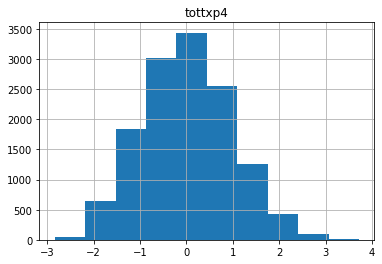

In [126]:
# visualize data histograms after normalization as a sanity check
df.hist(column=cols[0])
print("df shape:", df.shape)

In [127]:
"""# try to log transform to remove some right skewed columns
from numpy import log

# attempt to correct skew of certain columns
cols = ['CWS_0', 'CDS_0', 'EPS7p_0', 'HIVrisk', 'totttld', 'SPSm_0']

print(df.head())

for i in cols:
    temp = df[i]
    df.drop(columns=[i], inplace=True)
    x = temp.values #returns a numpy array
    for i in range(len(x)):
        if x[i] != 0:
            x[i] = log(x[i])
    x = pd.DataFrame({i : x})
    #transformed = transformed.transform(func = lambda x : log(x, 10))
    df = pd.concat([df, x], axis=1)

# visualize data histograms after normalization
for i in cols:
    df.hist(column=i)"""

"# try to log transform to remove some right skewed columns\nfrom numpy import log\n\n# attempt to correct skew of certain columns\ncols = ['CWS_0', 'CDS_0', 'EPS7p_0', 'HIVrisk', 'totttld', 'SPSm_0']\n\nprint(df.head())\n\nfor i in cols:\n    temp = df[i]\n    df.drop(columns=[i], inplace=True)\n    x = temp.values #returns a numpy array\n    for i in range(len(x)):\n        if x[i] != 0:\n            x[i] = log(x[i])\n    x = pd.DataFrame({i : x})\n    #transformed = transformed.transform(func = lambda x : log(x, 10))\n    df = pd.concat([df, x], axis=1)\n\n# visualize data histograms after normalization\nfor i in cols:\n    df.hist(column=i)"

In [128]:
# split data into train and test
from sklearn.model_selection import train_test_split

print("DF.SHAPE", df.shape)

Xtr, Xte, Ytr, Yte = train_test_split(df, Y, test_size=0.25, random_state=17)

print("Xtr:", Xtr.shape)
print("Ytr:", Ytr.shape)
print("Xte:", Xte.shape)
print("Yte:", Yte.shape)

DF.SHAPE (13345, 33)
Xtr: (10008, 33)
Ytr: (10008,)
Xte: (3337, 33)
Yte: (3337,)


In [129]:
# train regression model
# examine coefficients and drop columns with coefficient close to 0
# retrain regression model and print results

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt

lm = LinearRegression()
model = lm.fit(Xtr, Ytr)

coefficients = pd.DataFrame({'Coefficients': model.coef_})
columns = pd.DataFrame({'column_name': Xtr.columns})

combined = pd.DataFrame({'Coefficients': model.coef_, 'column_name': Xtr.columns})
print('FEATURES IN ORDER OF HIGHEST IMPACT ON MODEL...')
combined = combined.reindex(combined.Coefficients.abs().sort_values().index).iloc[::-1]
quarter = int(round(len(combined) / 4))
display_side_by_side(combined[0:quarter], combined[quarter:quarter*2], combined[quarter*2:quarter*3], combined[quarter*3:len(combined)])

predictions = pd.DataFrame({'Marijuana_Days': model.predict(Xte)})

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Yte, predictions))

y_pred = pd.concat([ID, zipcode, predictions], axis=1, sort=True).dropna()




FEATURES IN ORDER OF HIGHEST IMPACT ON MODEL...


,Coefficients,column_name
9,-17.432276,und15
31,-13.890199,SPSm_0
21,-11.521794,ERS21_0
27,-10.707268,HIVrisk
4,-9.207018,prsatx
28,8.509345,totttld
2,7.405399,unemplmt
25,-7.054403,engage30
,Coefficients,column_name
17,6.894526,suicprbs_0


Mean Absolute Error (MAE): 102.23741694558974


,column_name,percent_missing
ID,ID,0.0
,column_name,percent_missing
zipcode,zipcode,0.0
,column_name,percent_missing
Marijuana_Days,Marijuana_Days,0.0
